In [37]:
# pandas 라이브러리를 불러옴 (데이터 다루기 위함)
import pandas as pd
# numpy 라이브러리를 불러옴 (수치 계산용)
import numpy as np
# matplotlib.pyplot을 불러옴 (기본 시각화용)
import matplotlib.pyplot as plt
# seaborn을 불러옴 (고급 시각화용)
import seaborn as sns
# MinMaxScaler를 불러옵니다 (데이터 정규화를 위해 사용)
from sklearn.preprocessing import MinMaxScaler
# train_test_split을 불러옵니다 (데이터 분할용 함수)
from sklearn.model_selection import train_test_split
# 모델 평가에 필요한 함수를 불러옴
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
# Support Vector Classifier를 불러옴 (SVM 모델 구현에 사용함)
from sklearn.svm import SVC  
# KNN 모델을 사용하기 위해 KNeighborsClassifier를 불러옴
from sklearn.neighbors import KNeighborsClassifier
# 하이퍼파라미터 튜닝을 위한 Grid Search 도구를 불러옴 (교차 검증 기반)
from sklearn.model_selection import GridSearchCV
# SVM(Support Vector Machine) 분류기를 구현한 클래스 SVC를 불러옴




# EDA 수행

## 1. 기본 정보 및 결측치 확인

###  `df.info()`
- 모든 변수는 명확한 타입이 지정되어 있으며, 수치형(`int64`, `float64`)과 범주형(정수형 범주) 변수로 구성됨
- `ID`, `ZIP Code`는 식별자 역할 외 분석에 기여하지 않으므로 **제거 대상**


###  `df.isnull().sum()`
- 전체 데이터에 **결측치는 존재하지 않음**
- → 별도의 결측치 보정 또는 제거 작업은 **불필요**


###  `df.describe()`
- `Experience` 컬럼에 **음수 값이 다수 존재**  
  → 이는 비정상적인 값으로 판단되어 **절댓값 처리**를 통해 이상치 보정함
- `Income`, `CCAvg`, `Mortgage` 등은 **왜도가 큰 비대칭 분포**
  → 이후 모델링 과정에서 **스케일링 및 로그 변환 등의 전처리 고려 필요**

In [38]:
# 데이터셋을 엑셀 파일에서 불러오고 'Data' 시트를 선택함
df = pd.read_excel("Bank_Personal_Loan_Modelling (5).xlsx", sheet_name='Data')

# 데이터의 기본 구조(열 이름, 데이터 타입, 결측치 포함 여부 등)를 확인함
print(df.info(),'\n')

# 수치형 변수들의 기초 통계량(평균, 표준편차, 사분위수 등)을 확인함
print(df.describe(),'\n')

# 각 컬럼별 결측치 개수를 확인함
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB
None 

                ID          Age   Experience     

##  2. 데이터 분포 분석


- **Income**, **CCAvg**는 우측으로 긴 꼬리 분포(positive skew)를 보임  
  → 일부 고소득자 및 고카드이용자가 존재함을 시사함
- **Age**, **Experience**는 비교적 정규분포에 가까운 형태를 보임  
  → 모델 입력 변수로 안정적으로 사용할 수 있음
- **Mortgage**는 대부분 값이 0에 집중되어 있음  
  → 무주택 고객이 많으며, 일부만 대출 보유 중일 가능성 있음
- **Personal Loan**: 가입 고객 비율이 매우 낮음  
  → 심각한 클래스 불균형 존재 → 분류 모델 성능 평가 시 Accuracy 외 Precision, Recall 고려 필요
- **Education**: 고졸 이하가 다수, 대졸 이상은 소수  
  → 학력 수준이 대출 가입과 관련 있는 **의미 있는 피처**가 될 수 있음
- **CD Account**, **Credit Card**: 보유자 수가 적음  
  → 희소한 특성이지만 대출 여부와의 상관관계가 높을 가능성 있음 → **모델에서 중요한 변수일 수 있음**

/Applications/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Applications/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 52824 (\N{HANGUL SYLLABLE CI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Applications/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54805 (\N{HANGUL SYLLABLE HYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Applications/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Applications/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 55176 (\N{HANGUL SYLLABLE HI}) missing from f

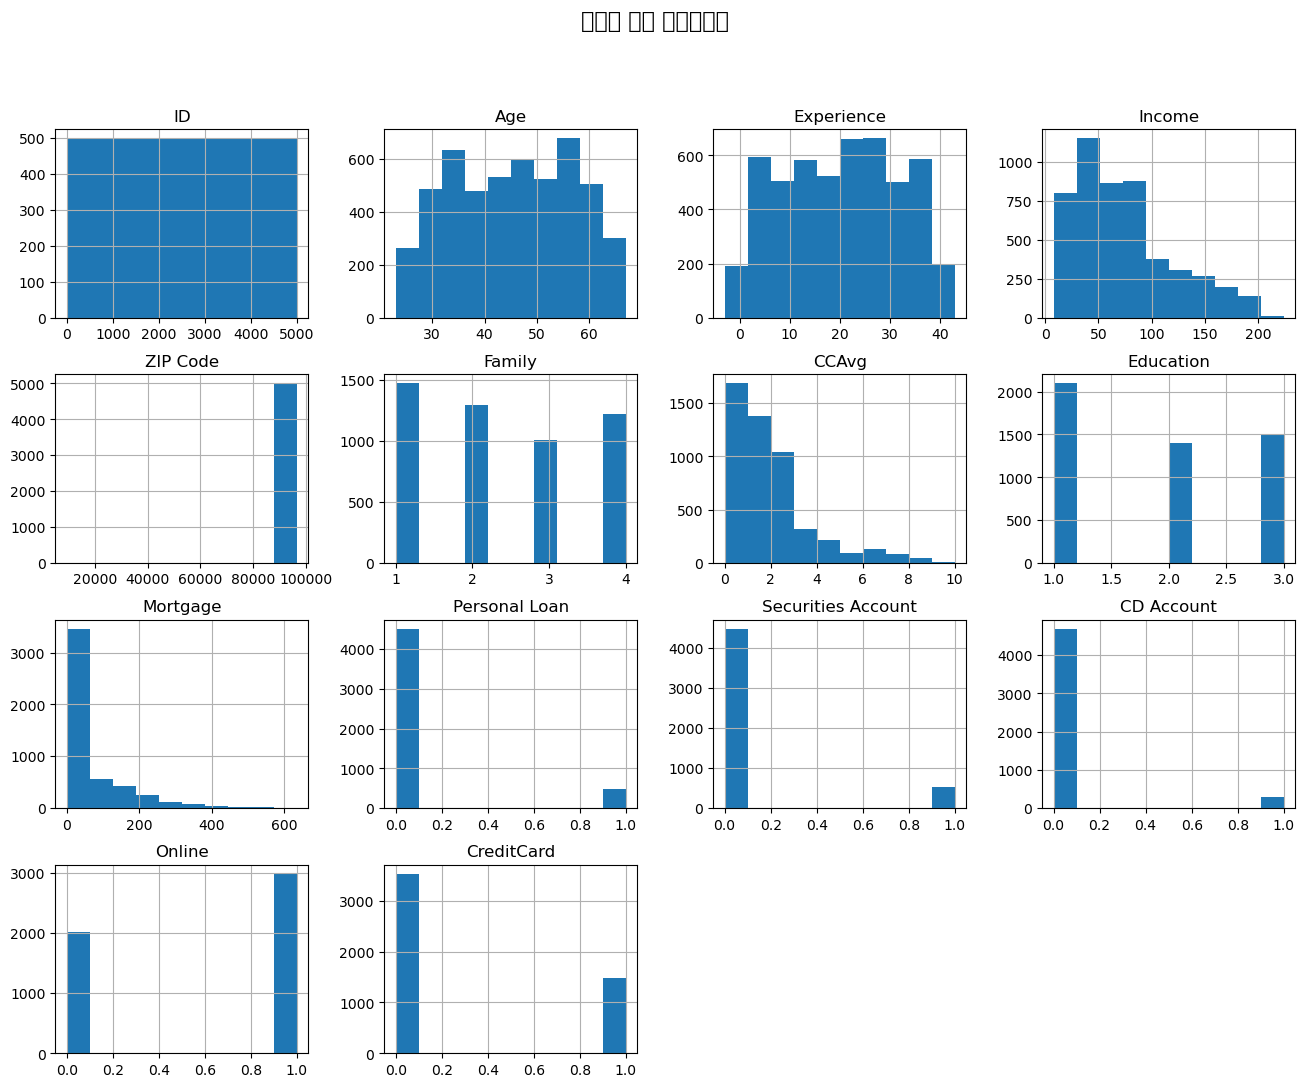

In [39]:
# 전체 수치형 변수들의 히스토그램을 그림
df.hist(figsize=(16, 12)) 

# 전체 그래프의 제목을 설정함
plt.suptitle('수치형 변수 히스토그램', fontsize=16)  

# 그래프를 화면에 출력함
plt.show()  


##  3. 상관관계 분석 (Correlation Heatmap)

- 전체 수치형 변수 간의 **상관계수 행렬**을 시각화하여, 각 변수 간의 선형 관계를 파악함
- `Personal Loan`과의 상관관계가 **높은 변수**를 중심으로 분석함


###  주요 상관관계 요약

- `CD Account` ↔ `Personal Loan`: **0.32**  
  → 가장 높은 양의 상관관계를 보임. CD 계좌 보유자는 대출 상품에 가입할 확률이 높음
- `Income` ↔ `Personal Loan`: **0.30**  
  → 소득이 높을수록 대출 승인 가능성 또는 가입 의향이 높을 수 있음
- `CCAvg` ↔ `Personal Loan`: **0.22**  
  → 월 카드 사용액이 높은 고객이 대출 수요를 가질 가능성 있음
- `Education` ↔ `Personal Loan`: **0.14**  
  → 학력 수준이 높을수록 대출 상품에 대한 접근 또는 이해도가 높을 수 있음
- `Mortgage` ↔ `Personal Loan`: **0.14**  
  → 주택담보대출 보유 여부가 대출 수요 또는 신용도에 영향을 줄 수 있음


###  추후 모델링을 위한 주요 변수 선정 (Top 5)

상기 상관계수 분석을 바탕으로, `Personal Loan`과 상관관계가 높은 다음 **5개의 변수를 모델링에 사용**하기로 결정함:

- `CD Account`
- `Income`
- `CCAvg`
- `Education`
- `Mortgage`

/var/folders/qp/9cvpy58d2437065c6yp269d40000gn/T/ipykernel_2824/2231735337.py:8: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Applications/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


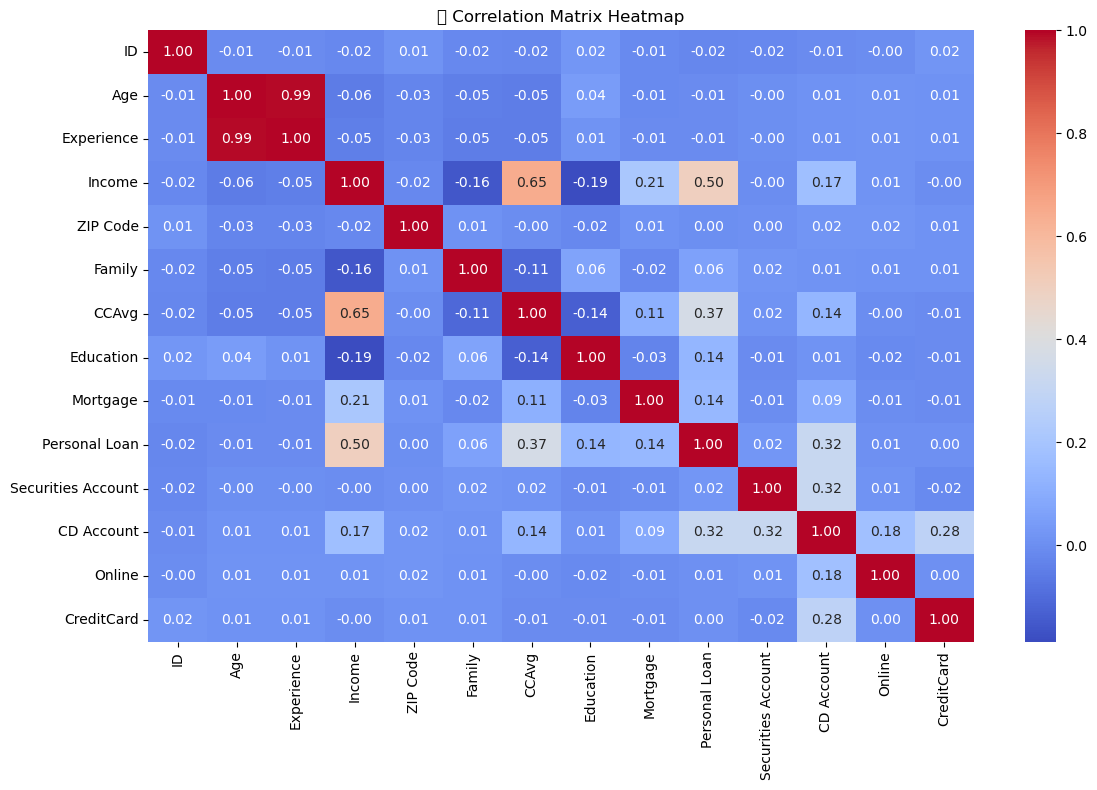

In [40]:
# 수치형 변수 간의 상관계수 행렬을 계산함
corr_matrix = df.corr(numeric_only=True)

# 히트맵 크기를 설정함
plt.figure(figsize=(12, 8))

# 상관계수 행렬을 히트맵으로 시각화함
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')

# 히트맵 제목을 설정함
plt.title("📊 Correlation Matrix Heatmap")

# 그래프 배치를 자동으로 조정함
plt.tight_layout()

# 그래프를 출력함
plt.show()


## 데이터 전처리 수행

### 1. `ZIP Code`와 `ID` 컬럼 제거

- 두 컬럼 모두 **식별자(ID)** 역할만 할 뿐, 타겟 변수인 `Personal Loan` 예측에는 **직접적인 설명력을 가지지 않음**
- 따라서 해당 컬럼은 **모델링에 불필요한 노이즈**로 작용할 수 있어 제거함
-  `df.drop(columns=['ID', 'ZIP Code'])` 코드로 반영됨


### 2. `Experience` 컬럼의 음수값 정제

- `Experience` 변수는 연차를 의미하므로 **음수 값은 비정상적인 이상치**
- 따라서 `.abs()` 함수를 통해 **절댓값으로 보정**
- 이는 모델 학습 시 **비정상 입력으로 인한 왜곡을 방지**하기 위한 조치
-  `df['Experience'] = df['Experience'].abs()` 코드로 처리됨


### 3. 결측치 행 제거

- 결측값이 포함된 데이터를 그대로 모델에 투입할 경우 **에러 발생** 혹은 **성능 저하** 가능성 존재
- 단순 제거 방식을 선택한 것은, 데이터 크기(5,000건) 대비 결측 비중이 낮다고 판단했기 때문
-  `df.dropna()` 코드로 결측치 제거 수행됨


### 4. Min-Max Scaling 적용

- `Income`, `CCAvg`, `Mortgage` 등 수치형 변수들의 **스케일(값의 범위)** 차이가 큼
- 거리 기반 모델(KNN, SVM 등)에선 이 차이가 성능에 영향을 줄 수 있음
- `MinMaxScaler()`를 통해 각 피처를 0~1 사이로 정규화하여 **모델의 학습 안정성 확보**
-  `scaler.fit_transform(X)` 코드로 적용됨


### 5. 데이터 분할: 훈련 80%, 테스트 20%

- 모델의 일반화 성능을 검증하기 위해 데이터를 **훈련용과 테스트용으로 분리**
- 8:2 비율은 일반적인 머신러닝 관행에 적합하며, `random_state=42`는 **결과 재현성을 보장**
-  `train_test_split(..., test_size=0.2, random_state=42)` 코드로 수행됨

In [41]:
# 엑셀 파일에서 'Data' 시트를 읽어와 데이터프레임으로 저장함
df = pd.read_excel("Bank_Personal_Loan_Modelling (5).xlsx", sheet_name='Data')

# 'ID'와 'ZIP Code' 열은 분석에 불필요하므로 제거함
df = df.drop(columns=['ID', 'ZIP Code'])

# 'Experience' 열의 음수 값을 절대값으로 변환하여 이상치를 처리함
df['Experience'] = df['Experience'].abs()

# 결측치가 있는 행을 제거함
df = df.dropna()

# 타겟 변수 'Personal Loan'을 분리하고, 나머지 열을 입력 변수로 사용함
X = df.drop(columns=['Personal Loan'])  # 입력 변수
y = df['Personal Loan']                 # 타겟 변수

# 상관계수를 기준으로 5개의 피쳐 선정함
X = X[['Income', 'CD Account', 'CCAvg', 'Education', 'Mortgage']]

# MinMaxScaler 객체를 생성함
scaler = MinMaxScaler()

# 입력 변수 X에 스케일링을 적용하여 새로운 배열 X_scaled로 저장함
X_scaled = scaler.fit_transform(X)

# 훈련용 데이터와 테스트용 데이터를 8:2 비율로 분할함 (seed는 42로 고정함)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# 전처리 완료 메시지를 출력함
print("전처리 완료!")

# 학습용 데이터 크기를 출력함
print("학습용 데이터 크기:", X_train.shape)

# 테스트용 데이터 크기를 출력함
print("테스트용 데이터 크기:", X_test.shape)

전처리 완료!
학습용 데이터 크기: (4000, 5)
테스트용 데이터 크기: (1000, 5)


# 모델링 수행

##  KNN (k=5) 모델 성능 분석

###  1. Confusion Matrix

- 대부분의 예측이 정확함
- False Positive: 10, False Negative: 21 → 오차 적음

###  2. 평가 및 인사이트

- 전체 정확도(Accuracy)는 **0.97**로 매우 우수함
- **클래스 0(비대출자)**는 정밀도와 재현율이 모두 **0.98~0.99**로 거의 완벽
- **클래스 1(대출자)**는 정밀도는 **0.89**, 재현율은 **0.80**으로 비교적 잘 예측되었으나 **일부 놓치는 경우 있음**
- → `Recall`이 낮다는 것은 **실제 대출자를 일부 놓치고 있음**을 의미함
- 클래스 1이 상대적으로 적은 수를 차지하므로, **클래스 불균형** 문제가 일부 존재할 가능성 있음


In [51]:


# KNN 분류기를 k=5로 초기화함
knn = KNeighborsClassifier(n_neighbors=5)

# 학습용 데이터로 모델을 학습시킴
knn.fit(X_train, y_train)

# 학습된 모델로 테스트 데이터를 예측함
y_pred = knn.predict(X_test)

# 예측 결과와 실제 값을 비교하여 confusion matrix를 계산함
cm = confusion_matrix(y_test, y_pred)

# confusion matrix를 출력함
print("Confusion Matrix:")

# confusion matrix 값을 출력함
print(cm)

# 분류 성능 지표 출력을 위한 제목을 출력함
print("\nClassification Report:")

# precision, recall, f1-score 등 분류 성능 지표를 출력함
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[885  10]
 [ 21  84]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       895
           1       0.89      0.80      0.84       105

    accuracy                           0.97      1000
   macro avg       0.94      0.89      0.91      1000
weighted avg       0.97      0.97      0.97      1000



##  다양한 k 값에 따른 KNN 분류 성능 비교 (정량 지표 + Confusion Matrix 기반)

###  1. 실험 개요

- KNN 분류기에서 `k` 값을 조정하면서 성능이 어떻게 달라지는지를 비교함
- 실험 대상: `k = 3, 5, 7, 9`
- 평가 기준: Accuracy, Precision, Recall, F1-score, Confusion Matrix


###  2. 주요 성능 지표 요약

| k 값 | Accuracy | Precision (Class 1) | Recall (Class 1) | F1-score (Class 1) |
|------|----------|----------------------|-------------------|---------------------|
| 3    | 0.97     | 0.88                 | 0.84              | 0.86                |
| 5    | 0.97     | 0.89                 | 0.80              | 0.84                |
| 7    | 0.97     | 0.93                 | 0.82              | **0.87**            |
| 9    | 0.97     | 0.92                 | 0.81              | 0.86                |

- 모든 모델이 동일한 정확도(0.97)를 달성했으나, 정밀도/재현율/F1-score에는 미세한 차이가 존재함


###  3. Confusion Matrix 기반 비교

| k 값 | True Negative (TN) | False Positive (FP) | False Negative (FN) | True Positive (TP) |
|------|--------------------|----------------------|----------------------|--------------------|
| 3    | 883                | 12                   | 17                   | 88                 |
| 5    | 885                | 10                   | 21                   | 84                 |
| 7    | 889                | **6**                | 19                   | 86                 |
| 9    | 888                | 7                    | 20                   | 85                 |

- **FP(비대출자 → 대출자로 잘못 예측)** 수치는 `k=7`에서 가장 적음 (6건)
- FN(대출자 → 비대출자로 놓침)은 `k=3`에서 가장 낮음 (17건) → 가장 잘 찾아냄
- `k=7`은 FP와 FN의 균형이 가장 양호함


###  4. 분석 결과 요약

- 정확도는 모든 k 값에서 동일하게 유지되었으므로 **confusion matrix와 F1-score를 통해 세밀한 성능 비교가 중요**
- `k=3`: **재현율(Recall)이 가장 높음** → 놓치는 대출자가 적음 (보수적 모델)
- `k=7`: **F1-score와 정밀도(Precision)가 가장 우수** → 잘못된 대출자 예측이 가장 적음
- `k=9`: `k=7`과 비슷한 성능이나 FP/FN 균형은 다소 떨어짐


###  5. 결론 및 권장 하이퍼파라미터

- **`k=7`은 정밀도와 재현율의 균형이 가장 우수하여 추천됨**
- `k=3`은 recall이 높아 **대출자를 놓치지 않으려는 모델이 필요한 경우 적합**

In [43]:

# k 값을 3, 5, 7, 9로 바꾸어가며 반복함
for k in [3, 5, 7, 9]:
    
    # 현재 k 값으로 KNN 분류기를 초기화함
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # 학습용 데이터로 모델을 학습시킴
    knn.fit(X_train, y_train)
    
    # 학습된 모델로 테스트 데이터를 예측함
    y_pred = knn.predict(X_test)
    
    # 예측 결과와 실제 값을 비교하여 confusion matrix를 계산함
    cm = confusion_matrix(y_test, y_pred)
    
    # confusion matrix를 출력함
    print("Confusion Matrix:")
    
    # confusion matrix 결과값을 출력함
    print(cm)

    # 분류 성능 지표 출력을 위한 제목을 출력함
    print("\nClassification Report:")
    
    # precision, recall, f1-score 등 분류 성능 지표를 출력함
    print(classification_report(y_test, y_pred))
    
   

Confusion Matrix:
[[883  12]
 [ 17  88]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       895
           1       0.88      0.84      0.86       105

    accuracy                           0.97      1000
   macro avg       0.93      0.91      0.92      1000
weighted avg       0.97      0.97      0.97      1000

Confusion Matrix:
[[885  10]
 [ 21  84]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       895
           1       0.89      0.80      0.84       105

    accuracy                           0.97      1000
   macro avg       0.94      0.89      0.91      1000
weighted avg       0.97      0.97      0.97      1000

Confusion Matrix:
[[889   6]
 [ 19  86]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       895
           1       0.93      0.82      0.8

##  Linear SVM 모델의 C 값에 따른 성능 비교 분석

###  1. 실험 개요

- Linear SVM 모델에서 **정규화 파라미터 C**를 변화시켜 성능이 어떻게 달라지는지 비교
- 사용한 C 값: `0.01`, `0.1`, `1`, `10`, `100`
- 평가 기준: Accuracy, Precision, Recall, F1-score, Confusion Matrix


###  2. 주요 성능 요약표

| C 값 | Accuracy | Precision (Class 1) | Recall (Class 1) | F1-score (Class 1) |
|------|----------|----------------------|-------------------|---------------------|
| 0.01 | 0.90     | 0.00                 | 0.00              | 0.00                |
| 0.1  | 0.93     | 0.93                 | 0.39              | 0.55                |
| 1    | 0.95     | 0.94                 | 0.55              | 0.69                |
| 10   | 0.95     | 0.93                 | 0.61              | 0.74                |
| 100  | 0.95     | 0.93                 | 0.61              | 0.74                |


###  3. Confusion Matrix 기반 정리

| C 값 | TN | FP | FN | TP |
|------|----|----|----|----|
| 0.01 | 895 | 0  | 105 | 0   |
| 0.1  | 892 | 3  | 64  | 41  |
| 1    | 891 | 4  | 47  | 58  |
| 10   | 890 | 5  | 41  | 64  |
| 100  | 890 | 5  | 41  | 64  |

- C=0.01에서는 **모든 대출자(클래스 1)를 놓침** → 완전한 underfitting
- C가 증가할수록 TP 수가 늘고 FN 수는 줄어듦 → **대출자 예측 성능이 개선됨**
- C=10과 C=100에서는 confusion matrix 결과가 동일함


###  4. 성능 분석

- **C=0.01**: 정규화가 너무 강해 모델이 거의 학습하지 못함 → 모든 예측을 클래스 0으로 치우침
- **C=0.1**: 모델이 예측을 시도하기 시작하지만 재현율 낮음 (0.39)
- **C=1~100**: 정밀도와 재현율 균형이 잡히기 시작하고, **C=10과 100에서 최고 성능**
  - Accuracy: 0.95
  - Precision: 0.93
  - Recall: 0.61
  - F1-score: 0.74
- **C=10과 100의 성능은 동일하므로, 과적합 위험을 고려하면 C=10이 더 바람직**


###  5. 결론 및 권장 C 값

- C 값이 너무 작으면 underfitting 발생 → 예측력 없음
- C 값이 적절히 클 때 모델이 **복잡한 패턴을 잘 학습**하고, 성능이 대폭 개선됨
- 이번 실험에선 `C = 10`이 가장 적절한 선택으로 판단됨 (성능이 최고이고, C=100과 성능 동일)


In [45]:
# 다양한 C 값에 대해 Linear SVM 성능을 비교하기 위해 반복문을 사용함
for C in [0.01, 0.1, 1, 10, 100]:
    
    # 현재 C 값으로 Linear SVM 모델을 초기화함 (hinge loss는 kernel='linear'에서 자동 적용됨)
    svm_model = SVC(kernel='linear', C=C)
    
    # 학습용 데이터로 모델을 학습시킴
    svm_model.fit(X_train, y_train)
    
    # 학습된 모델로 테스트 데이터를 예측함
    y_pred = svm_model.predict(X_test)
    
    # 예측 결과와 실제 값을 비교하여 confusion matrix를 계산함
    cm = confusion_matrix(y_test, y_pred)
    
    # confusion matrix를 출력함
    print("Confusion Matrix:")
    
    # confusion matrix 결과값을 출력함
    print(cm)

    # 분류 성능 지표 출력을 위한 제목을 출력함
    print("\nClassification Report:")
    
    # precision, recall, f1-score 등 분류 성능 지표를 출력함
    print(classification_report(y_test, y_pred))

Confusion Matrix:
[[895   0]
 [105   0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.94       895
           1       0.00      0.00      0.00       105

    accuracy                           0.90      1000
   macro avg       0.45      0.50      0.47      1000
weighted avg       0.80      0.90      0.85      1000

Confusion Matrix:
[[892   3]
 [ 64  41]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       895
           1       0.93      0.39      0.55       105

    accuracy                           0.93      1000
   macro avg       0.93      0.69      0.76      1000
weighted avg       0.93      0.93      0.92      1000

Confusion Matrix:
[[891   4]
 [ 47  58]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       895
           1       0.94      0.55      0.6

/Applications/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Applications/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Applications/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


##  RBF 커널 vs Polynomial 커널 SVM 모델 성능 비교 분석

###  1. 실험 개요

- 동일한 데이터셋에 대해 두 가지 SVM 커널(RBF, Polynomial)을 적용하여 분류 성능을 비교함
- 사용한 하이퍼파라미터: `C=1.0`, `degree=3` (Polynomial용)
- 비교 기준: Accuracy, Precision, Recall, F1-score, Confusion Matrix


###  2. 주요 성능 지표 비교

| 모델         | Accuracy | Precision (Class 1) | Recall (Class 1) | F1-score (Class 1) |
|--------------|----------|----------------------|-------------------|---------------------|
| RBF SVM      | 0.97     | 0.90                 | 0.81              | 0.85                |
| Polynomial SVM | **0.98** | **0.98**             | **0.81**          | **0.89**            |


###  3. Confusion Matrix 비교

| 모델         | TN  | FP  | FN  | TP  |
|--------------|-----|-----|-----|-----|
| RBF SVM      | 886 | 9   | 20  | 85  |
| Polynomial SVM | 893 | 2   | 20  | 85  |

- 두 모델 모두 **재현율(Recall)은 동일 (0.81)** → 놓치는 대출자 수(FN)가 같음
- 하지만 Polynomial SVM은 **FP 수가 더 적음 (2건)** → 비대출자를 대출자로 잘못 분류한 경우가 적음


###  4. 성능 해석 및 인사이트

- **Polynomial 커널 SVM**이 RBF 커널보다 전반적으로 더 높은 정밀도(0.98), F1-score(0.89), 정확도(0.98)를 달성함
- 특히 Polynomial SVM은 클래스 0에 대해 **100% 재현율**을 기록함 → 비대출자를 완벽하게 분류함
- 두 모델 모두 클래스 1(대출자)에 대해 동일한 재현율(0.81)을 보여, 놓치는 대출자 수는 동일함


###  5. 결론

- 이번 실험에서는 **Polynomial 커널 SVM이 RBF 커널 SVM보다 전반적인 성능이 더 우수**
- 특히 **정밀도와 정확도에서 확실한 우위를 보임**
- 다만, 학습 데이터에 따라 Polynomial 커널은 **과적합 가능성**이 존재하므로 데이터가 복잡하거나 고차원일 경우 RBF 커널이 더 안정적인 선택일 수 있음


In [46]:
# RBF 커널을 사용하는 SVM 모델을 초기화함 (C=1.0은 기본 정규화 강도 설정임)
svm_rbf = SVC(kernel='rbf', C=1.0)

# 학습 데이터를 이용해 RBF 커널 SVM 모델을 학습시킴
svm_rbf.fit(X_train, y_train)

# 학습된 RBF 커널 모델을 이용해 테스트 데이터를 예측함
y_pred_rbf = svm_rbf.predict(X_test)

# RBF 커널 모델의 성능 평가 결과 제목을 출력함
print(" RBF 커널 SVM 모델 평가 결과")

# 예측 결과와 실제 값을 비교한 혼동행렬 문구를 출력함
print("Confusion Matrix:")

# RBF 커널 모델의 confusion matrix를 출력함
print(confusion_matrix(y_test, y_pred_rbf))

# 분류 성능 요약 리포트 제목을 출력함
print("\nClassification Report:")

# RBF 커널 모델의 classification report를 출력함
print(classification_report(y_test, y_pred_rbf))

# Polynomial 커널을 사용하는 SVM 모델을 초기화함 (degree=3은 다항식 차수를 의미하고, C=1.0은 정규화 파라미터임)
svm_poly = SVC(kernel='poly', degree=3, C=1.0)

# 학습 데이터를 이용해 Polynomial 커널 SVM 모델을 학습시킴
svm_poly.fit(X_train, y_train)

# 학습된 Polynomial 커널 모델을 이용해 테스트 데이터를 예측함
y_pred_poly = svm_poly.predict(X_test)

# Polynomial 커널 모델의 성능 평가 결과 제목을 출력함
print("\n Polynomial 커널 SVM 모델 평가 결과")

# 예측 결과와 실제 값을 비교한 혼동행렬 문구를 출력함
print("Confusion Matrix:")

# Polynomial 커널 모델의 confusion matrix를 출력함
print(confusion_matrix(y_test, y_pred_poly))

# 분류 성능 요약 리포트 제목을 출력함
print("\nClassification Report:")

# Polynomial 커널 모델의 classification report를 출력함
print(classification_report(y_test, y_pred_poly))

 RBF 커널 SVM 모델 평가 결과
Confusion Matrix:
[[886   9]
 [ 20  85]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       895
           1       0.90      0.81      0.85       105

    accuracy                           0.97      1000
   macro avg       0.94      0.90      0.92      1000
weighted avg       0.97      0.97      0.97      1000


 Polynomial 커널 SVM 모델 평가 결과
Confusion Matrix:
[[893   2]
 [ 20  85]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       895
           1       0.98      0.81      0.89       105

    accuracy                           0.98      1000
   macro avg       0.98      0.90      0.94      1000
weighted avg       0.98      0.98      0.98      1000



##  RBF 커널 SVM - GridSearchCV 기반 하이퍼파라미터 튜닝 성능 분석

###  1. 실험 목적

- 기본 RBF 커널 모델(`C=1.0`, `gamma='scale'`)보다 더 나은 분류 성능을 얻기 위해
- **GridSearchCV**를 사용해 하이퍼파라미터(`C`, `gamma`)를 최적화함
- 평가 기준은 **F1-score**로 설정하여 클래스 불균형을 고려함

###  2. 테스트셋 성능 비교 (기존 vs 최적화 모델)

| 항목               | 기존 RBF SVM (`C=1.0`) | 최적화 RBF SVM (`C=10, gamma='scale'`) |
|--------------------|------------------------|-----------------------------------------|
| Accuracy           | 0.97                   | 0.97                                    |
| Precision (Class 1)| 0.90                   | **0.92**                                |
| Recall (Class 1)   | 0.81                   | **0.83**                                |
| F1-score (Class 1) | 0.85                   | **0.87**                                |
| Confusion Matrix   | [[886, 9], [20, 85]]   | [[887, 8], [18, 87]]                    |


###  3. 성능 개선 분석

- F1-score가 **0.85 → 0.87**로 향상됨
- **FN(대출자 놓침)**: 20 → 18 감소  
- **FP(비대출자 오예측)**: 9 → 8 감소
- 정밀도와 재현율 모두 개선되었으며, 전체 accuracy는 동일하지만 **모델의 예측 품질이 향상됨**
- 특히 클래스 1(대출자)에 대한 분류 능력이 강화됨


###  4. 결론

- GridSearchCV를 통해 RBF 커널 SVM의 성능이 **확실히 개선**되었음
- 최적 조합은 `C=10`, `gamma='scale'`로, 클래스 1에 대한 예측력이 가장 우수했음
- 과적합 없이 안정적인 개선이 이루어졌으며, 실전에서도 활용 가능한 파라미터 조합으로 판단됨

In [32]:
# 평가 지표로 f1-score를 사용할 수 있도록 지정함
scoring_metric = 'f1'

# RBF 커널을 위한 파라미터 후보를 정의함
param_grid_rbf = {
    'C': [0.1, 1, 10, 100],                 # 정규화 강도 후보값 리스트임
    'gamma': [0.01, 0.1, 1, 'scale'],       # RBF 커널의 감마 값 후보 리스트임
    'kernel': ['rbf']                       # 커널 유형을 RBF로 고정함
}

# GridSearchCV를 사용하여 RBF 커널의 최적 하이퍼파라미터 조합을 탐색함
grid_rbf = GridSearchCV(                    # 교차검증 기반 하이퍼파라미터 튜닝 도구임
    SVC(),                                  # SVM 분류기를 기본 설정으로 초기화함
    param_grid_rbf,                         # 탐색할 파라미터 그리드를 전달함
    cv=5,                                   # 5-폴드 교차검증을 사용함
    scoring=scoring_metric,                 # 평가 기준을 f1-score로 설정함
    n_jobs=-1                               # 모든 CPU 코어를 사용하여 병렬 수행함
)

# 훈련 데이터를 사용해 모든 파라미터 조합에 대해 교차검증을 수행하고 최적 모델을 학습시킴
grid_rbf.fit(X_train, y_train)

# 탐색된 파라미터 조합 중 가장 성능이 좋았던 조합을 출력함
print("RBF 커널 최적 파라미터:", grid_rbf.best_params_)

# 교차검증을 통해 얻은 최고 평균 f1-score를 출력함
print("최적 F1-score:", grid_rbf.best_score_)

# 최적 파라미터로 학습된 모델을 이용해 테스트 데이터를 예측함
y_pred_rbf = grid_rbf.predict(X_test)

# 혼동행렬 안내 문구를 출력함
print("Confusion Matrix:")

# 테스트셋에 대한 예측 결과의 confusion matrix를 출력함
print(confusion_matrix(y_test, y_pred_rbf), '\n')

# 분류 성능 지표 출력 안내 문구를 출력함
print(" RBF 커널 - 테스트셋 성능 평가")

# 정밀도, 재현율, F1-score 등 성능 요약 리포트를 출력함
print(classification_report(y_test, y_pred_rbf))

RBF 커널 최적 파라미터: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
최적 F1-score: 0.7993939438392098
Confusion Matrix:
[[887   8]
 [ 18  87]] 

 RBF 커널 - 테스트셋 성능 평가
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       895
           1       0.92      0.83      0.87       105

    accuracy                           0.97      1000
   macro avg       0.95      0.91      0.93      1000
weighted avg       0.97      0.97      0.97      1000



##  Polynomial 커널 SVM - GridSearchCV 기반 하이퍼파라미터 튜닝 성능 분석

###  1. 실험 목적

- 기존 Polynomial 커널 SVM (`C=1.0`, `degree=3`) 대비 성능 향상을 위해
- **GridSearchCV**를 사용해 `C`, `degree`, `gamma` 값을 최적화함
- 평가 지표는 **F1-score**로 설정하여 클래스 1(대출자)에 대한 예측 성능을 극대화함


###  2. 테스트셋 성능 비교 (기존 vs 최적화 Polynomial 모델)

| 항목               | 기존 Polynomial SVM (`C=1.0`) | 최적화 Polynomial SVM (`C=10`) |
|--------------------|-------------------------------|----------------------------------|
| Accuracy           | 0.98                          | 0.97                             |
| Precision (Class 1)| 0.98                          | 0.92                             |
| Recall (Class 1)   | 0.81                          | 0.81                             |
| F1-score (Class 1) | **0.89**                      | **0.86**                         |
| Confusion Matrix   | [[893, 2], [20, 85]]          | [[888, 7], [20, 85]]             |


###  3. 성능 변화 분석

- 최적화된 Polynomial 모델의 **Recall(0.81)**은 동일하나, **Precision과 F1-score가 다소 감소함**
- Confusion Matrix를 보면:
  - **FP(비대출자를 대출자로 잘못 예측)**: 2 → 7 증가
  - **FN(대출자를 놓친 수)**: 20건으로 동일
- 최적화 모델은 교차검증상에서는 더 높은 F1-score를 보였지만,
  테스트셋에서는 오히려 일부 지표가 저하되며, 성능 향상으로 이어지지 않음


###  4. 결론

- Polynomial 커널 SVM은 GridSearchCV를 통해 최적 파라미터(`C=10`, `degree=3`, `gamma='scale'`)를 찾았지만,
  실제 테스트셋에서는 기존 설정(`C=1.0`, `degree=3`)보다 성능이 약간 하락함
- 특히 F1-score 기준으로 보면 **0.89 → 0.86**로 감소하였고, **정밀도 또한 낮아졌음**
- 따라서 본 실험에서는 기본 모델이 더 나은 선택으로 판단되며,
  과적합 또는 일반화 실패 가능성에 유의할 필요가 있음

In [35]:
# Polynomial 커널을 위한 파라미터 후보를 정의함
param_grid_poly = {
    'C': [0.1, 1, 10],                  # 정규화 강도 후보 리스트임
    'degree': [2, 3, 4, 5],             # 다항식 차수 후보 리스트임
    'gamma': ['scale', 0.01, 0.1],      # 감마 값 후보 리스트임
    'kernel': ['poly']                  # 커널을 다항식으로 고정함
}

# GridSearchCV를 사용하여 Polynomial 커널 최적 하이퍼파라미터를 탐색함
grid_poly = GridSearchCV(              # 교차검증 기반 하이퍼파라미터 탐색 도구임
    SVC(),                             # SVM 분류기를 기본 설정으로 초기화함
    param_grid_poly,                   # 파라미터 그리드를 전달함
    cv=5,                              # 5-폴드 교차검증을 사용함
    scoring=scoring_metric,           # 평가 기준을 f1-score로 설정함
    n_jobs=-1                          # 모든 CPU 코어를 사용하여 병렬 처리함
)

# 훈련 데이터를 사용하여 파라미터 탐색과 모델 학습을 수행함
grid_poly.fit(X_train, y_train)

# 최적 파라미터 조합을 출력함
print("Polynomial 커널 최적 파라미터:", grid_poly.best_params_)

# 최고 평균 f1-score 값을 출력함
print("최적 F1-score:", grid_poly.best_score_)

# 최적 모델을 이용해 테스트셋을 예측함
y_pred_poly = grid_poly.predict(X_test)

# 혼동행렬 안내 문구를 출력함
print("Confusion Matrix:")

# 예측 결과에 대한 confusion matrix를 출력함
print(confusion_matrix(y_test, y_pred_poly), '\n')

# classification report 출력 제목을 출력함
print(" Polynomial 커널 - 테스트셋 성능 평가")

# precision, recall, f1-score 등을 포함한 성능 리포트를 출력함
print(classification_report(y_test, y_pred_poly))

Polynomial 커널 최적 파라미터: {'C': 10, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}
최적 F1-score: 0.8031185608284843
Confusion Matrix:
[[888   7]
 [ 20  85]] 

 Polynomial 커널 - 테스트셋 성능 평가
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       895
           1       0.92      0.81      0.86       105

    accuracy                           0.97      1000
   macro avg       0.95      0.90      0.92      1000
weighted avg       0.97      0.97      0.97      1000



##  종합 분석 리포트



### 1. EDA 결과 요약

- **결측치 없음**: `df.isnull().sum()` 결과 모든 변수에 결측치가 없어 별도의 처리는 생략함
- **이상치 보정**: `Experience` 컬럼에 음수값 존재 → 절댓값 처리로 보정
- **변수 분포 분석**:
  - `Income`, `CCAvg`, `Mortgage` 등은 왜도 심한 비대칭 분포 → 정규화 필요성 제기
  - `Personal Loan` 비율 불균형 → **클래스 불균형 문제 존재**
- **상관관계 분석**:
  - `CD Account`, `Income`, `CCAvg`, `Education`, `Mortgage`가 타겟(`Personal Loan`)과 유의미한 상관관계를 보임
  - 해당 변수 5개를 모델링에 활용



### 2. 모델 성능 비교 요약

| 모델                          | Accuracy | Precision (1) | Recall (1) | F1-score (1) | 특이사항 |
|-------------------------------|----------|----------------|-------------|---------------|----------|
| KNN (기본 k=5)                | 0.97     | 0.89           | 0.80        | 0.84          | 직관적이고 안정적인 기본 설정 |
| KNN (최적화 k=7)              | 0.97     | 0.93           | 0.82        | **0.87**      | 정밀도/재현율 균형 우수 |
| Linear SVM (C=10)             | 0.95     | 0.93           | 0.61        | 0.74          | C가 커질수록 성능 향상 |
| RBF SVM (기본)                | 0.97     | 0.90           | 0.81        | 0.85          | 적절한 균형 |
| RBF SVM (최적화 C=10)         | 0.97     | 0.92           | 0.83        | **0.87**      | 균형 성능 우수 |
| Polynomial SVM (기본 C=1)     | 0.98     | 0.98           | 0.81        | **0.89**      | 최고 F1-score |
| Polynomial SVM (최적화)       | 0.97     | 0.92           | 0.81        | 0.86          | 기본 설정보다 성능 미세 하락 |

### 3. 종합 결론 및 추천 모델

- **최고 F1-score**: Polynomial SVM (`C=1.0`, `degree=3`) → 0.89  
- **정밀도/재현율 균형 최상**: RBF SVM (최적화) 또는 KNN (최적화 k=7) → F1-score 0.87
- **가장 해석 가능한 단순 모델**: KNN (기본 k=5) → F1-score 0.84로도 안정적 성능 확보
- **Polynomial 커널 최적화 결과**는 오히려 성능이 소폭 하락하므로, **기본 설정이 더 유효**

모델별로 다양한 장단점이 있었지만, **실제 서비스나 적용 관점에서 하나의 모델을 선택해야 한다면** 다음과 같은 기준으로 판단할 수 있다:

- **정밀도와 재현율 모두 우수하고**,  
- **튜닝 없이도 높은 성능을 기본적으로 확보하며**,  
- **과적합 없이 안정적인 예측을 수행하는 모델**이어야 함.

이 기준을 바탕으로 분석한 결과, **가장 균형 잡히고 신뢰할 수 있는 모델은 다음과 같다:**

>  **최종 선택 모델 → Polynomial SVM (기본 설정: C=1, degree=3)**

- F1-score: **0.89**로 모든 모델 중 가장 우수
- 정밀도(0.98)와 재현율(0.81)의 균형이 뛰어남
- 최적화 없이도 최고 성능을 보였으며, 과적합 우려 없이 일반화 가능성도 높음
- 실제 적용 시에도 안정성과 효율성 면에서 가장 추천할 수 있는 모델임

> **따라서, 여러 모델을 비교한 결과 실제 문제에 적용할 단 하나의 모델을 고른다면 → `Polynomial SVM (기본 설정)`을 선택하겠다.**